# Regression Problem on Facebook Ad Campaign
### Yanni Zhang

## 1. Data cleaning and modification

In [1]:
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt
original = pd.read_csv('data.csv')

In [2]:
# From line 761, there are two columns in the original data missing, resulting that other columns missplaced 
# so here I am fixing the issue.
top = original.truncate(before=0, after=760)
bottom = original.truncate(before=761, after=1142)
first_half = bottom[['ad_id','reporting_start','reporting_end']].copy()
first_half['campaign_id'] = 0
first_half['fb_campaign_id'] = 0
first_half['age']=  bottom['campaign_id']
first_half['gender'] = bottom['fb_campaign_id']
first_half['interest1'] = bottom['age']
first_half['interest2'] = bottom['gender']
first_half['interest3'] = bottom['interest1']
first_half['impressions'] = bottom['interest2']
first_half['clicks'] = bottom['interest3']
first_half['spent'] = bottom['impressions']
first_half['total_conversion'] = bottom['clicks']
first_half['approved_conversion'] = bottom['spent']

In [3]:
# Standardize the 'impressions' columns
# Only keeping columns with useful information and export it as a new csv file
full = pd.concat([top, first_half], ignore_index=True)
full.insert(0,'idx',full.index)
full.insert(12,'im_std', (full['impressions']-full['impressions'].mean())/full['impressions'].std())
full = full[['idx','interest1','interest2','interest3','impressions','im_std','clicks','spent','total_conversion','approved_conversion']]
full.to_csv(r'fulldata.csv',index=False, header=True)

In [4]:
# After preliminary analysis, I found that there are three different ad campaigns in the dataset.
# So after a general analysis on the whole dataset, I believe that a closer look at each individual campaign
# would help to understand detailed information, so I am generating three small csv files here.
cam_id = list(top['campaign_id'].unique())
original = original.drop(['ad_id','reporting_start','reporting_end','fb_campaign_id','age','gender'],axis=1)
first = cam_id[0]
second = cam_id[1]
third = cam_id[2]
first_cam = original[original['campaign_id']==first]
second_cam = original[original['campaign_id']==second]
third_cam = original[original['campaign_id']==third]

In [5]:
# In order to use 'interests' columns in analysis, use one hot encoding method to alter these columns
def encode_and_bind(df, feature):
    dummies = pd.get_dummies(df[feature],prefix = feature)
    res = pd.concat([df, dummies], axis=1)
    total = res.drop([feature], axis=1)
    return total 

features = ['interest1', 'interest2', 'interest3']
for feature in features:
    first_cam = encode_and_bind(first_cam, feature)
    second_cam = encode_and_bind(second_cam, feature)
    third_cam = encode_and_bind(third_cam, feature)

In [6]:
# Standardize the 'impressions' column
first_cam.insert(0,'idx',first_cam.index)
first_cam.insert(3,'im_std', (first_cam['impressions']-first_cam['impressions'].mean())/first_cam['impressions'].std())
second_cam = second_cam.reset_index().drop(['index'],axis=1)
second_cam.insert(0,'idx',second_cam.index)
second_cam.insert(3,'im_std', (second_cam['impressions']-second_cam['impressions'].mean())/second_cam['impressions'].std())
third_cam = third_cam.reset_index().drop(['index'],axis=1)
third_cam.insert(0,'idx',third_cam.index)
third_cam.insert(3,'im_std', (third_cam['impressions']-third_cam['impressions'].mean())/third_cam['impressions'].std())

In [7]:
# Saving three small csv files
first_cam.to_csv(r'cam1.csv',index=False, header=True)
second_cam.to_csv(r'cam2.csv',index=False, header=True)
third_cam.to_csv(r'cam3.csv',index=False, header=True)

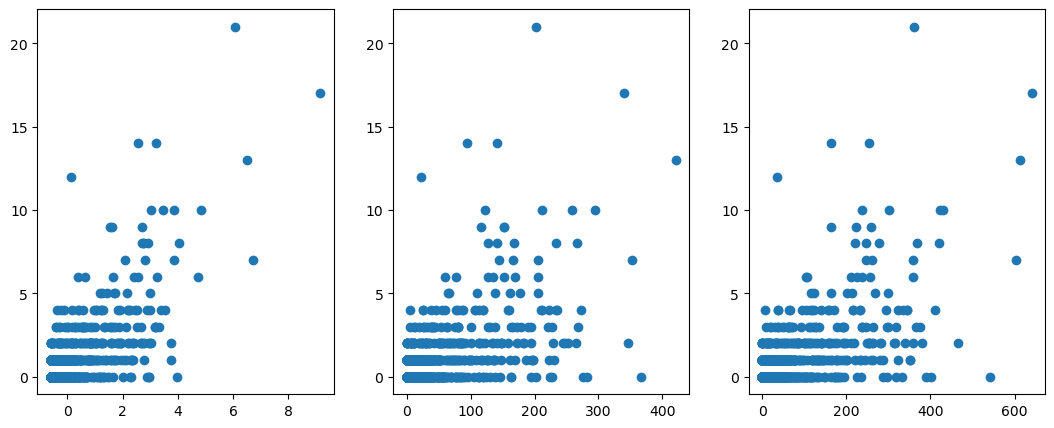

In [8]:
# From the following plots, it would be reasonable to assmue a linear relationship between predictor parameters 
# and response parameter instead of nonlinearity.
df = pd.read_csv('fulldata.csv')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,5))
ax1.scatter(df['im_std'], df['approved_conversion'])
ax2.scatter(df['clicks'], df['approved_conversion'])
ax3.scatter(df['spent'], df['approved_conversion'])

## 2. Regression

In [9]:
%load_ext gams_magic
m = gams.exchange_container

In [10]:
%%gams
set
    col   columns from the full dataset /idx,interest1,interest2,interest3,impressions,im_std,clicks,spent,total_conversion,approved_conversion/
    
    col_1 columns from campaign 1 /idx,campaign_id,impressions,im_std,clicks,spent,total_conversion,approved_conversion,
    interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_24,interest1_25,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_63,interest1_65,
    interest2_8,interest2_12,interest2_13,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_24,interest2_25,interest2_26,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_37,interest2_64,interest2_67,interest2_70,
    interest3_8,interest3_10,interest3_11,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_26,interest3_27,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_38,interest3_65,interest3_68/
    
    col_2 columns from campaign 2 /idx,campaign_id,impressions,im_std,clicks,spent,total_conversion,approved_conversion,
    interest1_2,interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_22,interest1_23,interest1_24,interest1_25,interest1_26,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_36,interest1_63,interest1_64,interest1_65,
    interest2_3,interest2_4,interest2_6,interest2_7,interest2_9,interest2_10,interest2_11,interest2_12,interest2_13,interest2_14,interest2_15,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_23,interest2_24,interest2_25,interest2_26,interest2_27,interest2_28,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_35,interest2_36,interest2_37,interest2_38,interest2_40,interest2_41,interest2_64,interest2_65,interest2_66,interest2_67,interest2_68,interest2_69,interest2_70,interest2_71,
    interest3_3,interest3_6,interest3_7,interest3_8,interest3_9,interest3_10,interest3_11,interest3_12,interest3_13,interest3_14,interest3_15,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_25,interest3_26,interest3_27,interest3_28,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_35,interest3_36,interest3_37,interest3_38,interest3_40,interest3_41,interest3_64,interest3_65,interest3_66,interest3_67,interest3_68,interest3_69,interest3_70,interest3_71/
   
    col_3 columns from campaign 2 /idx,campaign_id,impressions,im_std,clicks,spent,total_conversion,approved_conversion,
    interest1_2,interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_22,interest1_23,interest1_24,interest1_25,interest1_26,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_36,interest1_63,interest1_64,interest1_65,interest1_66,
    interest2_3,interest2_4,interest2_5,interest2_6,interest2_7,interest2_8,interest2_9,interest2_10,interest2_11,interest2_12,interest2_13,interest2_14,interest2_15,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_23,interest2_24,interest2_25,interest2_26,interest2_27,interest2_28,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_35,interest2_36,interest2_37,interest2_38,interest2_39,interest2_40,interest2_41,interest2_42,interest2_64,interest2_65,interest2_66,interest2_67,interest2_68,interest2_69,interest2_70,interest2_71,interest2_72,
    interest3_3,interest3_4,interest3_5,interest3_6,interest3_7,interest3_9,interest3_10,interest3_11,interest3_12,interest3_13,interest3_14,interest3_15,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_25,interest3_26,interest3_27,interest3_28,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_35,interest3_36,interest3_37,interest3_38,interest3_39,interest3_40,interest3_41,interest3_42,interest3_64,interest3_65,interest3_66,interest3_67,interest3_68,interest3_69,interest3_70,interest3_71,interest3_72/
    
    idx            total observations /0*1142/
    cam1 observations from campaign 1 /0*53/
    cam2 observations from campaign 2 /0*463/
    cam3 observations from campaign 3 /0*242/;

table fulldata(idx,col)
$ondelim
$include fulldata.csv
$offdelim
;

table cam1data(cam1,col_1)
$ondelim
$include cam1.csv
$offdelim
;

table cam2data(cam2,col_2)
$ondelim
$include cam2.csv
$offdelim
;

table cam3data(cam3,col_3)
$ondelim
$include cam3.csv
$offdelim
;

### 2.1 General analysis on the whole dataset

#### 2.1.1 Linear model without the 'intercept' term

In [11]:
%%gams
set k_1(col)      parameters /im_std,clicks,spent/;
parameter       b(idx)     RHS values
                data_1(idx,k_1)   data points;
b(idx) = fulldata(idx,'approved_conversion');
data_1(idx,k_1)  = fulldata(idx,k_1);

variables
X_1(k_1)    unknown parameter estimates
r(idx)    residuals
obj     Objective value;
equations objdef_1,rdef_1(idx);

objdef_1..
    obj =e= sum(idx, sqr(r(idx)));

rdef_1(idx)..
    r(idx) =e= sum(k_1, data_1(idx,k_1)*X_1(k_1)) - b(idx);
    
model full_1 /objdef_1, rdef_1/;
solve full_1 using qcp minimizing obj;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),2118.5281,1144,1147,QCP,CONOPT,0.005


#### 2.1.2 Linear model with the 'intercept' term

In [12]:
%%gams
set k_2  parameters and an additional dummy column /im_std,clicks,spent,dummy/;
parameter  data_2(idx,k_2)   data points;
data_2(idx,'im_std')  = fulldata(idx,'im_std');
data_2(idx,'clicks')  = fulldata(idx,'clicks');
data_2(idx,'spent')  = fulldata(idx,'spent');
data_2(idx,'dummy') = 1;

variables
X_2(k_2)    unknown parameter estimates

equations objdef_2,rdef_2(idx);

objdef_2..
    obj =e= sum(idx, sqr(r(idx)));

rdef_2(idx)..
    r(idx) =e= sum(k_2, data_2(idx,k_2)*X_2(k_2)) - b(idx);
    
model full_2 /objdef_2, rdef_2/;
solve full_2 using qcp minimizing obj;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),1536.7875,1144,1148,QCP,CONOPT,0.005


<AxesSubplot:xlabel='parameter'>

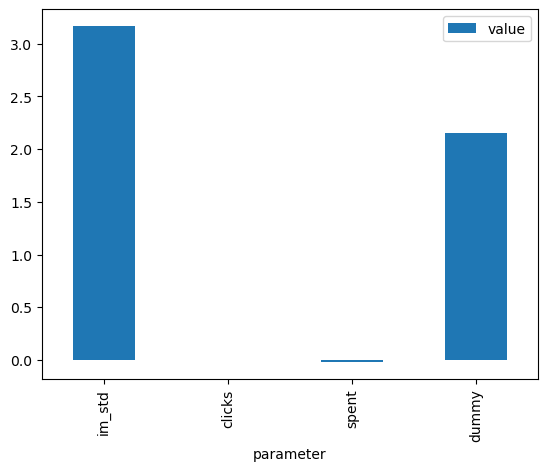

In [13]:
para = m.data['k_2'].records['uni_0']
value = m.data['X_2'].records['level']
df = pd.DataFrame()
df['parameter'] = para
df['value'] = value
df.plot(x = 'parameter', y = 'value', kind = 'bar')

### 2.2  Analysis on specific ad campaign

#### 2.2.1 Campaign_id 916

In [14]:
%%gams
set
k1all(col_1)    /im_std,clicks,spent/
k11(col_1)      /im_std,clicks,spent,interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_24,interest1_25,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_63,interest1_65/
k12(col_1)      /im_std,clicks,spent,interest2_8,interest2_12,interest2_13,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_24,interest2_25,interest2_26,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_37,interest2_64,interest2_67,interest2_70/
k13(col_1)      /im_std,clicks,spent,interest3_8,interest3_10,interest3_11,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_26,interest3_27,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_38,interest3_65,interest3_68/;
parameter       b1(cam1)     RHS values
                a1all(cam1,k1all)   data points;
b1(cam1) = cam1data(cam1,'approved_conversion');
a1all(cam1,k1all)  = cam1data(cam1,k1all);

# Without adding categarical columns
variables
X1all(k1all)    unknown parameter estimates
r1(cam1)    residuals;
equations objdef1all,rdef1all(cam1);

objdef1all..
    obj =e= sum(cam1, sqr(r1(cam1)));

rdef1all(cam1)..
    r1(cam1) =e= sum(k1all, a1all(cam1,k1all)*X1all(k1all)) - b1(cam1);
    
model camp1all /objdef1all, rdef1all/;
solve camp1all using qcp minimizing obj;
# Add 'interest1'
parameter a11(cam1,k11)   data points;
a11(cam1,k11)  = cam1data(cam1,k11);
variables X11(k11)    unknown parameter estimates
equations rdef11(cam1);
rdef11(cam1)..
    r1(cam1) =e= sum(k11, a11(cam1,k11)*X11(k11)) - b1(cam1);
model camp11 /camp1all - rdef1all + rdef11/;
solve camp11 using qcp minimizing obj;
# Add 'interest2'
parameter a12(cam1,k12)   data points;
a12(cam1,k12)  = cam1data(cam1,k12);
variables X12(k12)    unknown parameter estimates
equations rdef12(cam1);
rdef12(cam1)..
    r1(cam1) =e= sum(k12, a12(cam1,k12)*X12(k12)) - b1(cam1);
model camp12 /camp1all - rdef1all + rdef12/;
solve camp12 using qcp minimizing obj;
# Add 'interest3'
parameter a13(cam1,k13)   data points;
a13(cam1,k13)  = cam1data(cam1,k13);
variables X13(k13)    unknown parameter estimates
equations rdef13(cam1);
rdef13(cam1)..
    r1(cam1) =e= sum(k13, a13(cam1,k13)*X13(k13)) - b1(cam1);
model camp13 /camp1all - rdef1all + rdef13/;
solve camp13 using qcp minimizing obj;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),14.3591,55,58,QCP,CONOPT,0.002
1,Normal (1),OptimalLocal (2),8.2237,55,76,QCP,CONOPT,0.004
2,Normal (1),OptimalLocal (2),6.6606,55,81,QCP,CONOPT,0.001
3,Normal (1),OptimalLocal (2),6.2414,55,81,QCP,CONOPT,0.005


#### 2.2.2 Campaign_id 936

In [15]:
%%gams
set
k2all(col_2)    /im_std,clicks,spent/
k21(col_2)      /im_std,clicks,spent,interest1_2,interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_22,interest1_23,interest1_24,interest1_25,interest1_26,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_36,interest1_63,interest1_64,interest1_65/
k22(col_2)      /im_std,clicks,spent,interest2_3,interest2_4,interest2_6,interest2_7,interest2_9,interest2_10,interest2_11,interest2_12,interest2_13,interest2_14,interest2_15,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_23,interest2_24,interest2_25,interest2_26,interest2_27,interest2_28,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_35,interest2_36,interest2_37,interest2_38,interest2_40,interest2_41,interest2_64,interest2_65,interest2_66,interest2_67,interest2_68,interest2_69,interest2_70,interest2_71/
k23(col_2)      /im_std,clicks,spent,interest3_3,interest3_6,interest3_7,interest3_8,interest3_9,interest3_10,interest3_11,interest3_12,interest3_13,interest3_14,interest3_15,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_25,interest3_26,interest3_27,interest3_28,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_35,interest3_36,interest3_37,interest3_38,interest3_40,interest3_41,interest3_64,interest3_65,interest3_66,interest3_67,interest3_68,interest3_69,interest3_70,interest3_71/;
parameter       b2(cam2)     RHS values
                a2all(cam2,k2all)   data points;
b2(cam2) = cam2data(cam2,'approved_conversion');
a2all(cam2,k2all)  = cam2data(cam2,k2all);

# Without adding categarical columns
variables
X2all(k2all)    unknown parameter estimates
r2(cam2)    residuals
obj;
equations objdef2all,rdef2all(cam2);

objdef2all..
    obj =e= sum(cam2, sqr(r2(cam2)));

rdef2all(cam2)..
    r2(cam2) =e= sum(k2all, a2all(cam2,k2all)*X2all(k2all)) - b2(cam2);
    
model camp2all /objdef2all, rdef2all/;
solve camp2all using qcp minimizing obj;

# Add 'interest1'
parameter a21(cam2,k21)   data points;
a21(cam2,k21)  = cam2data(cam2,k21);
variables X21(k21)    unknown parameter estimates
equations rdef21(cam2);

rdef21(cam2)..
    r2(cam2) =e= sum(k21, a21(cam2,k21)*X21(k21)) - b2(cam2);
model camp21 /camp2all - rdef2all + rdef21/;
solve camp21 using qcp minimizing obj;
# Add 'interest2'
parameter a22(cam2,k22)   data points;
a22(cam2,k22)  = cam2data(cam2,k22);
variables X22(k22)    unknown parameter estimates
equations rdef22(cam2);

rdef22(cam2)..
    r2(cam2) =e= sum(k22, a22(cam2,k22)*X22(k22)) - b2(cam2);
model camp22 /camp2all - rdef2all + rdef22/;
solve camp22 using qcp minimizing obj;
# Add 'interest3'
parameter a23(cam2,k23)   data points;
a23(cam2,k23)  = cam2data(cam2,k23);
variables X23(k23)    unknown parameter estimates
equations rdef23(cam2);

rdef23(cam2)..
    r2(cam2) =e= sum(k23, a23(cam2,k23)*X23(k23)) - b2(cam2);
model camp23 /camp2all - rdef2all + rdef23/;
solve camp23 using qcp minimizing obj;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),147.4440,465,468,QCP,CONOPT,0.003
1,Normal (1),OptimalLocal (2),130.6062,465,492,QCP,CONOPT,0.004
2,Normal (1),OptimalLocal (2),120.6342,465,512,QCP,CONOPT,0.017
3,Normal (1),OptimalLocal (2),122.5256,465,512,QCP,CONOPT,0.018


#### 2.2.3 Campaign_id 1178

In [16]:
%%gams
set
k3all(col_3)           /im_std,clicks,spent/
k31(col_3)          /im_std,clicks,spent,interest1_2,interest1_7,interest1_10,interest1_15,interest1_16,interest1_18,interest1_19,interest1_20,interest1_21,interest1_22,interest1_23,interest1_24,interest1_25,interest1_26,interest1_27,interest1_28,interest1_29,interest1_30,interest1_31,interest1_32,interest1_36,interest1_63,interest1_64,interest1_65,interest1_66/
k32(col_3)          /im_std,clicks,spent,interest2_3,interest2_4,interest2_5,interest2_6,interest2_7,interest2_8,interest2_9,interest2_10,interest2_11,interest2_12,interest2_13,interest2_14,interest2_15,interest2_16,interest2_17,interest2_18,interest2_19,interest2_20,interest2_21,interest2_22,interest2_23,interest2_24,interest2_25,interest2_26,interest2_27,interest2_28,interest2_29,interest2_30,interest2_31,interest2_32,interest2_33,interest2_34,interest2_35,interest2_36,interest2_37,interest2_38,interest2_39,interest2_40,interest2_41,interest2_42,interest2_64,interest2_65,interest2_66,interest2_67,interest2_68,interest2_69,interest2_70,interest2_71,interest2_72/
k33(col_3)          /im_std,clicks,spent,interest3_3,interest3_4,interest3_5,interest3_6,interest3_7,interest3_9,interest3_10,interest3_11,interest3_12,interest3_13,interest3_14,interest3_15,interest3_16,interest3_17,interest3_18,interest3_19,interest3_20,interest3_21,interest3_22,interest3_23,interest3_24,interest3_25,interest3_26,interest3_27,interest3_28,interest3_29,interest3_30,interest3_31,interest3_32,interest3_33,interest3_34,interest3_35,interest3_36,interest3_37,interest3_38,interest3_39,interest3_40,interest3_41,interest3_42,interest3_64,interest3_65,interest3_66,interest3_67,interest3_68,interest3_69,interest3_70,interest3_71,interest3_72/;
parameter       b3(cam3)     RHS values
                a3all(cam3,k3all)   data points;
b3(cam3) = cam3data(cam3,'approved_conversion');
a3all(cam3,k3all)  = cam3data(cam3,k3all);

# Without adding categarical columns
variables
X3all(k3all)    unknown parameter estimates
r3(cam3)    residuals
obj;
equations objdef3all,rdef3all(cam3);

objdef3all..
    obj =e= sum(cam3, sqr(r3(cam3)));

rdef3all(cam3)..
    r3(cam3) =e= sum(k3all, a3all(cam3,k3all)*X3all(k3all)) - b3(cam3);
    
model camp3all /objdef3all, rdef3all/;
solve camp3all using qcp minimizing obj;
# Add 'interest1'
parameter a31(cam3,k31)   data points;
a31(cam3,k31)  = cam3data(cam3,k31);
variables X31(k31)    unknown parameter estimates
equations rdef31(cam3);

rdef31(cam3)..
    r3(cam3) =e= sum(k31, a31(cam3,k31)*X31(k31)) - b3(cam3);
model camp31 /camp3all - rdef3all + rdef31/;
solve camp31 using qcp minimizing obj;
# Add 'interest2'
parameter a32(cam3,k32)   data points;
a32(cam3,k32)  = cam3data(cam3,k32);
variables X32(k32)    unknown parameter estimates
equations rdef32(cam3);

rdef32(cam3)..
    r3(cam3) =e= sum(k32, a32(cam3,k32)*X32(k32)) - b3(cam3);
model camp32 /camp3all - rdef3all + rdef32/;
solve camp32 using qcp minimizing obj;
# Add 'interest3'
parameter a33(cam3,k33)   data points;
a33(cam3,k33)  = cam3data(cam3,k33);
variables X33(k33)    unknown parameter estimates
equations rdef33(cam3);

rdef33(cam3)..
    r3(cam3) =e= sum(k33, a33(cam3,k33)*X33(k33)) - b3(cam3);
model camp33 /camp3all - rdef3all + rdef33/;
solve camp33 using qcp minimizing obj;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),856.2611,244,247,QCP,CONOPT,0.002
1,Normal (1),OptimalLocal (2),477.3268,244,272,QCP,CONOPT,0.002
2,Normal (1),OptimalLocal (2),454.6554,244,296,QCP,CONOPT,0.003
3,Normal (1),OptimalLocal (2),455.6861,244,295,QCP,CONOPT,0.002


## 3. Cross-validation and tradeoff

In [17]:
# Clean data for analysis
# Want to generate a classifier function 
# so drop data where nobody clicks the ad 
# and add a column of 1/0 to indicate if there is any approved conversion
cv = full[full['clicks']!=0].copy()
cv = cv.reset_index().drop(['idx','index'],axis=1)
for i in range(len(cv)):
    if cv.at[i,'approved_conversion'] != 0 :
        cv.at[i,'success'] = 1
    else:
        cv.at[i,'success'] = -1
cv = cv[['im_std','clicks','spent','success']]
cv.insert(0,'idx',cv.index)
cv.to_csv(r'cv.csv',index=False, header=True)

In [18]:
%%gams
set
j    /i,im_std,clicks,spent,success/
c(j) /im_std,clicks,spent/
i    /0*935/;

table clean(i,j)
$ondelim
$include cv.csv
$offdelim
;

parameter y(i),Data(i,c);
y(i) = clean(i,'success');
Data(i,c) = clean(i,c);
set train(i),test(i),tune(i),t(i);
train(i) = yes;
test(i) = yes$(uniform(i.ord,i.ord+1)<i.ord+0.2);
scalar lembda; lembda = 1;

positive variables delta(i);
variables obj, w(c), gamma;
equations defobj, cons(i);

cons(t)..
    y(t)*(sum(c, Data(t,c)*w(c)) - gamma) + delta(t) =g= 1;

defobj..
    obj =e= lembda * sum(t, delta(t)) + 0.5*sum(c, sqr(w(c)));


model crossval /all/;
set fold /f1*f5/;
set fo(fold);
set rp(fold,i) "random fold";
parameter order(i);
option shuffle = order;
loop(i,
  fo(fold) = yes$(fold.ord eq mod(i.ord-1,card(fold))+1);
  rp(fo, i + (-ord(i) + order(i))) = yes;
);

set trials /t1*t6/;
parameter tr_val(trials) /t1 0.01, t2 0.1, t3 1, t4 5, t5 10, t6 100/;
parameter errvec(trials);
set err(i); 
loop(trials,
  lembda = tr_val(trials);
  err(i) = no;
  loop(fold,
    tune(i) = yes$rp(fold,i);
    t(i) = train(i) - tune(i);
    solve crossval using qcp min obj;
    loop(tune,
      if ((sum(c, Data(tune,c)*w.l(c)) - gamma.l) * y(tune) < 0,
        err(tune) = yes;
      );
    );
  );
  errvec(trials) = card(err);
);

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),2118.5281,6084,2998,QCP,CONOPT,0.28
1,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.314
2,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.249
3,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.313
4,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.234
5,Normal (1),OptimalLocal (2),2118.5281,6084,2998,QCP,CONOPT,0.322
6,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.199
7,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.097
8,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.024
9,Normal (1),OptimalLocal (2),2118.5281,6085,2999,QCP,CONOPT,0.022


In [19]:
m.data['errvec'].records

,trials_0,value
0,t1,401.0
1,t2,383.0
2,t3,355.0
3,t4,349.0
4,t5,347.0
5,t6,344.0


In [20]:
%%gams
lembda = tr_val('t3');
t(i) = train(i);
solve crossval using qcp min obj;

parameter pred(i);
scalar errorate;
loop(test,
  if ((sum(c, Data(test,c)*w.l(c)) - gamma.l) > 0,
    pred(test) = 1;
  else
    pred(test) = -1;
  );
);
parameter diff(i);
set err2(i); 
diff(test) = y(test) - pred(test);
err2(test) = yes$(diff(test) ne 0);
errorate = card(err2)/card(pred);
display errorate;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),2118.5281,6272,3186,QCP,CONOPT,0.372


In [21]:
m.data['errorate'].records

,value
0,0.410891


In [22]:
df = m.data['w'].records
df

,c_0,level,marginal,lower,upper,scale
0,im_std,3.960413,0.0,-inf,inf,1.0
1,clicks,-0.031404,0.0,-inf,inf,1.0
2,spent,-0.005269,0.0,-inf,inf,1.0


<AxesSubplot:xlabel='c_0'>

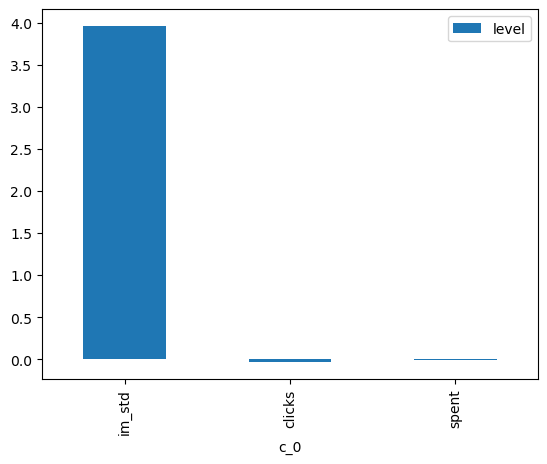

In [23]:
df.plot(x = 'c_0', y = 'level', kind = 'bar')

In [24]:
%gams_cleanup --closedown

## 4. Application

### 4.1 Introduction

I am interested in how different predictor vairables of the ads campaigns on Facebook in predicting the actual conversion. By definition from Kaggle, the place where I get the original dataset, actual conversion means that the user became an actual active user after click on the ad and made a purchase.

### 4.2 Approach

<p>I originally thought that there would be some nonlinear relationships between predictor variables and the response variable. But after preliminary analysis using plots and some 'cheat' tricks using sklearn in Python, I believe that a linear model would be the best to predict, so that what I chose. By comparing models with and without an 'intercept' term, I found that adding a dummy predictor would help better predict in terms of reducing residuals.</p>
<p>Later, I used one hot encoder to encode categerical 'interest' columns and did seperated analysis on three different ad campaigns.</p>
<p>Lastly, in order to generate cassifier, I filtered out ads with 0 click. If there is at least one approved conversion, then it would be considered as 'success' and have value 1, otherwises would have value as -1. And then I used different tuning parameters combined with five-folds cross validation.</p>

### 4.3 Model and solution

<p>For all the models in the project, I used quadratic programming.</p>
<p>I used linear least squared to minmize residuals and found that the  number of impressions after standarding is the strongest predictor variable as its coefficient is the largest (from plot in output13).</p>
<p>For the individual campaigns, I found that by adding the categorical columns, the objective value decreases repectively.</p>
<p>For cross-validation, I used K-folds and tuning values from 0.01 to 100.</p>

### 4.4 Conclusion

<p>There is linear relationship between 'impression' (how many times the ad appears on Facebook), 'clicks' (how many times the ad being clickes), 'spent' (how much money companies spent on the ad), and 'actual conversion' (how many people became active user of the product), and 'impression' has a sigficant stronger relationship with the response variable, both from general least squared and cross-validation.</p>
<p>In all three ad campaigns, adding categarical columns would improve the predicting ability, while for first and third the differences are more evident, and it seems 'interest3', which is the last interest people put on their Facebook page generally give better prediction than the first interest.</p>
<p>From the tuning and cross-validation, the 'best' tuning value would still give around 40% of error rate, which possibly indicates that there are more unknown and underlying predictor variable that are influential in predicting response variable.</p>

### 4.5 Concerns and extensions

<p>From the current dataset, it seems that 'clicks' and 'spent' are highly dependent, as if there are 0 clicks, there are 0 spent. Though I tried to add an interactive term into the model, it only lowered the accuracy.</p>
<p>Another concern would be that I used three categarical columns seperatedly, but I think it would be better if they could be combined to one as we are more interested in the impact of all interests of one person. And there is no table in the original dataset that indicates what the number represents. If that is available, some qualitative analysis could be done, because the first and third campaigns clearly are more targeted to certain group of people.</p>